<a href="https://colab.research.google.com/github/cavendano01/Statistical-Learning-II/blob/main/Anomaly-detection-%26-Dimensionality-reduction/Anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Usando el dataset de estaturas(en google drive) aplicar detección de anomalías

  a. Usar como training-set la primera pestaña “normales” (y=0)
	
  b. La segunda pestaña “valtest(normales)” contiene datos normales (y=0):

		* Usar la mitad para cross-validation

		* Usar la mitad para testing

  c. La tercera pestaña “valtest(anomalias)” contiene anomalías(y=1):
		* Usar la mitad para cross-validation 
		* Usar la mitad para testing
2. Los datos de cross-validation deben ser usados para selección de hyper-parámetros(por ejemplo el umbral epsilon) y/o selección de transformaciones a aplicar a las variables.

3. Usar los datos de testing para reportar las métricas de evaluación apropiadas

4. Es permitido usar librerías estadísticas(por ejemplo scipy.stats) para cosas como: 

  a. Estimación de parámetros(función de densidad)

  b. Cálculo de densidades y/o probabilidades con la función de densidad estimada


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
print ("Packages Loaded")

Packages Loaded


In [9]:
#Data Loading
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Number of datapoints in training set: 46
Number of dimensions/features: 2
[[ 1.74 31.  ]
 [ 1.72 24.  ]
 [ 1.78 34.  ]
 [ 1.65 32.  ]]


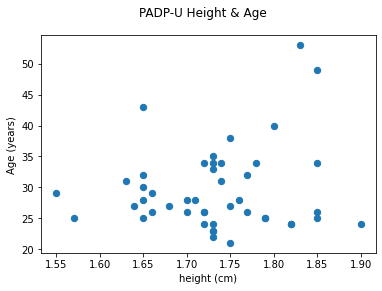

In [41]:
#Creating tr_data Dataframe 
heights = pd.read_excel("/content/drive/MyDrive/Statistical-Learning-II/practica-2/estaturas.xlsx","normales")
valtest = pd.read_excel("/content/drive/MyDrive/Statistical-Learning-II/practica-2/estaturas.xlsx","valtest(normales)")
anomalies = pd.read_excel("/content/drive/MyDrive/Statistical-Learning-II/practica-2/estaturas.xlsx","valtest(normales)")


x = heights.values
tr_data = np.array(x).astype('float')

a = valtest.values 
cv_data = np.array(a).astype('float')

b = anomalies.values
gt_data = np.array(a).astype('float')




n_training_samples = tr_data.shape[0]
n_dim = tr_data.shape[1]


print('Number of datapoints in training set: %d' % n_training_samples)
print('Number of dimensions/features: %d' % n_dim)

print(tr_data[1:5,:])

plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis');
plt.suptitle('PADP-U Height & Age')
plt.xlabel("height (cm)")
plt.ylabel("Age (years)")
plt.show()

In [28]:
from sklearn.metrics import f1_score
y_true = [0, 0, 1, 0, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0]
#f1_score(y_true, y_pred, average='binary')  
 

f1_score(y_true, y_pred, average=None)

array([0.4       , 0.57142857])

In [29]:
def estimateGaussian(dataset):
  mu = np.mean(dataset, axis=0)
  sigma = np.mean(dataset.T)
  return mu, sigma
  
def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

In [45]:
def selectThresholdByCV(probs,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 1000
    epsilons = np.arange(min(probs),max(probs),stepsize)
    for epsilon in np.nditer(epsilons):

        predictions = (probs < epsilon) 
        #print(predictions)
        f = f1_score(gt, predictions,average='binary')
        #print(f)
        #print('------')
        if f > best_f1:
            #print('----')
            best_f1 = f
            best_epsilon = epsilon
    
    return best_f1, best_epsilon

In [51]:
mu, sigma = estimateGaussian(tr_data)
p = multivariateGaussian(tr_data,mu,sigma)

p_cv = multivariateGaussian(cv_data,mu,sigma)
fscore, ep = selectThresholdByCV (p_cv,gt_data)

ValueError: ignored

In [50]:
outliers = np.array(np.where(p<ep))

plt.figure()
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.plot(tr_data[:,0],tr_data[:,1],'bx')
plt.plot(tr_data[outliers,0],tr_data[outliers,1],'ro')
plt.show()

NameError: ignored